In [10]:
import sys
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Add the directory containing your module to the Python path
project_root = os.path.abspath('/Users/jonasschuff/Documents/Projects/fully-autonomous-tuning/signal_processing/')
print("Adding to sys.path:", project_root)
sys.path.append(project_root)

# Print sys.path to verify the path is added
print("sys.path:", sys.path)

# Now try to import the module
try:
    from signal_processing.bias_triangle_detection.alt_PSB_detection import PSB_detector_new
    print("Module imported successfully")
except ModuleNotFoundError as e:
    print("ModuleNotFoundError:", e)
except Exception as e:
    print("An error occurred:", e)


Current Working Directory: /Users/jonasschuff/Documents/Projects/fully-autonomous-tuning/demonstrations
Adding to sys.path: /Users/jonasschuff/Documents/Projects/fully-autonomous-tuning/signal_processing
sys.path: ['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/Users/jonasschuff/opt/anaconda3/envs/test2/lib/python312.zip', '/Users/jonasschuff/opt/anaconda3/envs/test2/lib/python3.12', '/Users/jonasschuff/opt/anaconda3/envs/test2/lib/python3.12/lib-dynload', '', '/Users/jonasschuff/opt/anaconda3/envs/test2/lib/python3.12/site-packages', '/Users/jonasschuff/Documents/Projects/fully-autonomous-tuning', '/Users/jonasschuff/opt/anaconda3/envs/test2/lib/python3.12/site-packages/setuptools/_vendor', '/Users/jonasschuff/Documents/Projects/fully-autonomous-tuning', '/Users/jonasschuff/Documents/Projects/fully-autonomous-tuning', '/Users/jonasschuff/Documents/Projects/fully-autonomous-tuning/signa

/Users/jonasschuff/opt/anaconda3/envs/test2/bin/python


In [3]:
import os

project_root = '/Users/jonasschuff/Documents/Projects/fully-autonomous-tuning'
print("Contents of project_root:", os.listdir(project_root))

signal_processing_path = os.path.join(project_root, 'signal_processing')
print("Contents of signal_processing:", os.listdir(signal_processing_path))

bias_triangle_detection_path = os.path.join(signal_processing_path, 'bias_triangle_detection')
print("Contents of bias_triangle_detection:", os.listdir(bias_triangle_detection_path))


Contents of project_root: ['.DS_Store', 'model_trainings', 'LICENSE', 'requirements.txt', 'minimal_example', 'pyproject.toml', 'pipelines', 'autonomous_tuning.egg-info', 'helper_functions', 'README.md', 'setup.py', 'experiment_control', 'data_visualisation', 'build', '.git', 'qcodes-addons', 'data', 'signal_processing', 'demonstrations', '.idea']
Contents of signal_processing: ['.DS_Store', 'danon_gap_detector', '__init__.py', 'low_res_double_dot_clf', 'psb_classifier', 'bias_triangle_processing', 'coulomb_peak_classifier', 'bias_triangle_detection', 'high_res_double_dot_clf']
Contents of bias_triangle_detection: ['im_utils.py', 'fastai_training', 'switches', 'btriangle_detection.py', 'readout_search_rectangle.py', 'edsr.py', '__init__.py', 'scores', 'btriangle_location_detection.py', 'utils', '__pycache__', 'bounding_box.py', 'qcodes_db_utils.py', 'alt_PSB_detection.py', 'wideshot_detection', 'bayesian_optimization', 'cotunnelling_detection.py', 'notebooks', 'coord_change', 'danon_gap

In [4]:
import sys
print("Python version:", sys.version)
print("Python executable:", sys.executable)


Python version: 3.12.4 | packaged by conda-forge | (main, Jun 17 2024, 10:11:10) [Clang 16.0.6 ]
Python executable: /Users/jonasschuff/opt/anaconda3/envs/test2/bin/python3.12


In [5]:
import signal_processing
help(signal_processing)

Help on package signal_processing:

NAME
    signal_processing

DESCRIPTION
    # from .high_res_double_dot_clf import *
    # from .high_res_double_dot_clf.dd_clf import *
    #
    # from .psb_classifier import *

PACKAGE CONTENTS
    danon_gap_detector (package)
    high_res_double_dot_clf (package)
    low_res_double_dot_clf (package)
    psb_classifier (package)

FILE
    /Users/jonasschuff/opt/anaconda3/envs/test2/lib/python3.12/site-packages/signal_processing/__init__.py




In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import qcodes as qc
import os
from qcodes import (Measurement,
                    experiments,
                    initialise_database,
                    initialise_or_create_database_at,
                    load_by_guid,
                    load_by_run_spec,
                    load_experiment,
                    load_last_experiment,
                    load_or_create_experiment,
                    new_experiment,
                    ManualParameter)
import matplotlib.pyplot as plt

db_name = "../data/GeSiNW_fully_autonomous_tuning.db" # Database name
sample_name = "Butch" # Sample name
exp_name = "Qubit_Search" # Experiment name

db_file_path = os.path.join(os.getcwd(), db_name)
qc.config.core.db_location = db_file_path
initialise_or_create_database_at(db_file_path)

experiment = load_or_create_experiment(experiment_name = exp_name,
                                       sample_name = sample_name)

plt.style.use('default')
import sys
sys.path.append('../')

# Load data

In [2]:
# local_ids = [293, 294]
# from qcodes.dataset import (
#     Measurement,
#     connect,
#     extract_runs_into_db,
#     load_experiment_by_name,
#     load_or_create_experiment,
# )
# source_conn = connect(db_name)
# target_path = "../data/GeSiNW_fully_autonomous_tuning.db"
# target_conn = connect(target_path)
# for _id in local_ids:
#     extract_runs_into_db(db_name, target_path, _id)

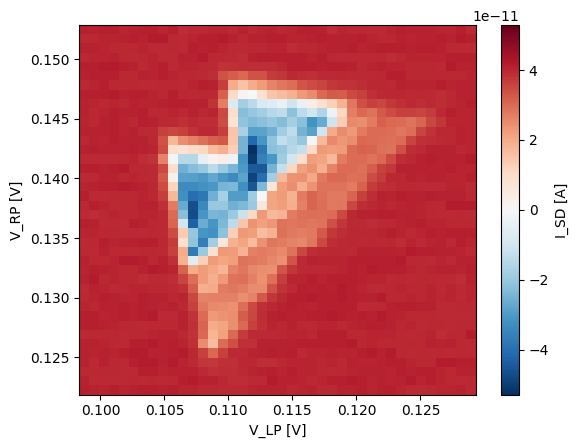

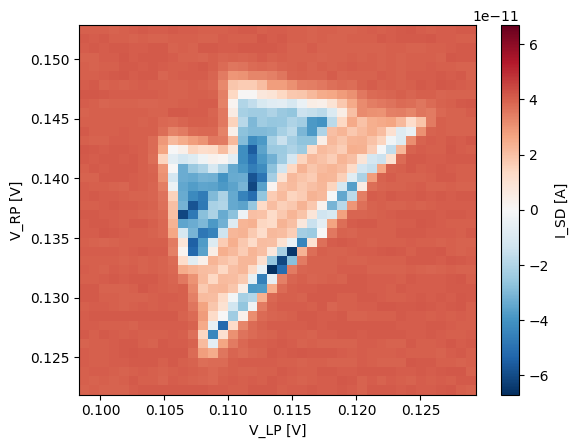

In [3]:
ds_low_magnet = load_by_guid('063410be-0000-0000-0000-018c04e0abda')
ds_low_magnet.to_xarray_dataset()["I_SD"].plot()
plt.show()
ds_high_magnet = load_by_guid('34b00bbd-0000-0000-0000-018c04e74c96')
ds_high_magnet.to_xarray_dataset()["I_SD"].plot()

In [4]:
data_high_magnet_xarray = ds_high_magnet.to_xarray_dataset()
data_low_magnet_xarray = ds_low_magnet.to_xarray_dataset()

# Apply Method

In [5]:
from signal_processing.bias_triangle_detection.alt_PSB_detection import PSB_detector_new
from signal_processing.bias_triangle_detection.btriangle_properties import \
    detect_base_alt_slope
from pipelines.utils import draw_boxes_and_preds
from signal_processing import EnsembleClassifier
from signal_processing.bias_triangle_detection import btriangle_detection, btriangle_properties
from signal_processing.bias_triangle_detection import btriangle_location_detection

invert_current = True
bias_direction = 'positive_bias'
if invert_current:
    data_high_magnet_analysis = -data_high_magnet_xarray["I_SD"].to_numpy()
    data_low_magnet_analysis = -data_low_magnet_xarray['I_SD'].to_numpy()
else:
    data_high_magnet_analysis = data_high_magnet_xarray['I_SD'].to_numpy()
    data_low_magnet_analysis = data_low_magnet_xarray['I_SD'].to_numpy()


axes_values = []
axes_values_names = []
axes_units = []

for item, n in dict(data_high_magnet_xarray.dims).items():
    axes_values.append(data_high_magnet_xarray[item].to_numpy())
    axes_values_names.append(data_high_magnet_xarray[item].long_name)
    axes_units.append(data_high_magnet_xarray[item].unit)

def psb_via_segmentation(blocked, unblocked, bias_direction="positive_bias"):
    res_h = 2
    relative_min_area = 0.01
    allow_MET = False
    thr_method = 'triangle'
    denoising = True
    triangle_direction = "down"

    if bias_direction == "positive_bias":
        pass
    elif bias_direction == "negative_bias":
        unblocked = unblocked.T
        blocked = blocked.T
    else:
        raise NotImplementedError

    min_area_h = (unblocked.shape[0] * unblocked.shape[1] * res_h * res_h) * relative_min_area

    unblocked, ims, masks = btriangle_detection.triangle_segmentation_alg(unblocked,
                                                                          res=res_h,
                                                                          min_area=min_area_h,
                                                                          thr_method=thr_method,
                                                                          denoising=denoising,
                                                                          allow_MET=allow_MET,
                                                                          direction=triangle_direction)
    try:
        base, corner_pts, c_im = detect_base_alt_slope(unblocked, masks, 'down')
    except:
        print(f'Error caught, base detection failed')
        return False
    plt.imshow(c_im)
    plt.show()
    min_area_h = (blocked.shape[0] * blocked.shape[1] * res_h * res_h) * relative_min_area

    blocked, ims2, masks2 = btriangle_detection.triangle_segmentation_alg(blocked,
                                                                          res=res_h,
                                                                          min_area=min_area_h,
                                                                          thr_method=thr_method,
                                                                          denoising=denoising,
                                                                          allow_MET=allow_MET,
                                                                          direction=triangle_direction)
    slope_tol = 0.4
    int_tol = 0.05
    seg_tol = 0.05
    median = False
    pair, PSB = PSB_detector_new(unblocked,
                                 blocked,
                                 base,
                                 masks,
                                 triangle_direction,
                                 slope_tol=slope_tol,
                                 int_tol=int_tol,
                                 median=median,
                                 seg_tol=seg_tol)
    return PSB

prediction = psb_via_segmentation(data_low_magnet_analysis, data_high_magnet_analysis)
print(f'PSB detected: {prediction}')

ModuleNotFoundError: No module named 'signal_processing.bias_triangle_detection'

In [7]:
import signal_processing

Current Working Directory: /Users/jonasschuff/Documents/Projects/fully-autonomous-tuning/demonstrations
sys.path: ['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/Users/jonasschuff/opt/anaconda3/envs/test2/lib/python312.zip', '/Users/jonasschuff/opt/anaconda3/envs/test2/lib/python3.12', '/Users/jonasschuff/opt/anaconda3/envs/test2/lib/python3.12/lib-dynload', '', '/Users/jonasschuff/opt/anaconda3/envs/test2/lib/python3.12/site-packages', '../', '/Users/jonasschuff/opt/anaconda3/envs/test2/lib/python3.12/site-packages/setuptools/_vendor', '/Users/jonasschuff/Documents/Projects/fully-autonomous-tuning']


In [9]:
help(signal_processing)

Help on package signal_processing:

NAME
    signal_processing

DESCRIPTION
    # from .high_res_double_dot_clf import *
    # from .high_res_double_dot_clf.dd_clf import *
    #
    # from .psb_classifier import *

PACKAGE CONTENTS
    danon_gap_detector (package)
    high_res_double_dot_clf (package)
    low_res_double_dot_clf (package)
    psb_classifier (package)

FILE
    /Users/jonasschuff/opt/anaconda3/envs/test2/lib/python3.12/site-packages/signal_processing/__init__.py


